In [1]:
#importamos las librerias
import pandas as pd  
import numpy as np

##Ejercicio N°1:

#Escribir una función que devuelva un Hexágono.

In [78]:
#definimos nuestra función en base a dos parametros
def exagono(n, t):
  va=[]; ve=[]; wa=[]; we=[]  #creamos las listas a completar
  for i in range(n,2*n+1,1):  #definimos un rango en función del primer parámetro
    va.append(i)              #agregamos a nuestra lista
  for j in range(n,-1,-1):    #rango para la lista de los espacios que necesitaremos
    ve.append(j)
  dicv=dict(zip(va, ve))      ####convertimos en un diccionario con la cantidad de caracteres que tendra nuestro exagono y los espacios que le darán forma

  for p in range(2*n-1,n-1,-1): #similar a la primera parte solo que ahora para la parte inferior
    wa.append(p)
  for q in range(1,n+1,1):
    we.append(q)
  dicw=dict(zip(wa, we))
  for l, k in dicv.items():
    print(' '*k + t*l*2)
  for r, s in dicw.items():
    print(' '*s + t*r*2)

exagono(5,'¬')

     ¬¬¬¬¬¬¬¬¬¬
    ¬¬¬¬¬¬¬¬¬¬¬¬
   ¬¬¬¬¬¬¬¬¬¬¬¬¬¬
  ¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬
 ¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬
¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬
 ¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬
  ¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬
   ¬¬¬¬¬¬¬¬¬¬¬¬¬¬
    ¬¬¬¬¬¬¬¬¬¬¬¬
     ¬¬¬¬¬¬¬¬¬¬


##Ejercicio 2

Generar un Notebook Colab con código y resultados, con el
siguiente fichero autos.csv que contiene información de autos de
un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables
- Generar 6 nuevas variables aplicando los siguientes criterios
con las variables numéricas:
★ Log10(var1/var2)

★ Sqrt(var1)exp(var2)/200
★ Si var 1 &gt; var 2 → 5, caso contrario 3
★ 1/logn(var1/var2)*100
★ var2**2/var1

Generar 3 variables cualitativas ordinales con los siguientes
criterios:

★ Si es mayor a la “media + 1*desviación estándar” →
Alto
★ Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio
★ Si es menor a la “media - 1*desviación estándar” →
Bajo
Nota: Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.
- Crear una función que muestre los siguientes gráficos para
las variables numéricas según una variable numérica:

❖ Cajas y bigotes
❖ Barras de la media
❖ Histograma con Curva

- Crear una función que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las
generadas), para cada país.

In [79]:
#cargamos la data desde nuestra PC
#from google.colab import files
#files.upload()

In [81]:
data=pd.read_csv('autos.csv', delimiter=';') #mostramos nuestra data
#data

In [5]:
data.isnull().sum()                         # mostramos la cantidad de nulos por columna

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [6]:
data.info()                              # el tipo de dato de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [7]:
columnas = data.select_dtypes(include=['float64', 'int']).columns  #filtramos las columnas por el tipo
columnas

Index(['Millas_Por_Galon', 'Cilindros', 'Peso_En_Libras', 'Desplazamiento',
       'Aceleracion', 'Caballo_De_Fuerza'],
      dtype='object')

In [82]:
data1=data.loc[:,columnas]                                #llamamos solo a la columnas con el tipo antes mencionado y le asignamos un nuevo nombre
#data1

In [83]:
from sklearn.impute import KNNImputer                     #imputamos la data

imputacion_NP = KNNImputer(n_neighbors=2)
data1 =imputacion_NP.fit_transform(data1)
data1

array([[  18. ,    8. , 3504. ,  307. ,   12. ,  130. ],
       [  15. ,    8. , 3693. ,  350. ,   11.5,  165. ],
       [  18. ,    8. , 3436. ,  318. ,   11. ,  150. ],
       ...,
       [  32. ,    4. , 2295. ,  135. ,   11.6,   84. ],
       [  28. ,    4. , 2625. ,  120. ,   18.6,   79. ],
       [  31. ,    4. , 2720. ,  119. ,   19.4,   82. ]])

In [84]:
df2=pd.DataFrame(data=data1, columns=columnas)          #transformamos nuestro array en un dataframe
#df2

In [85]:
df2.isnull().sum()                                      #comprobamos los nulos

Millas_Por_Galon     0
Cilindros            0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Caballo_De_Fuerza    0
dtype: int64

In [86]:
columnas2=data.select_dtypes(include=['object']).columns    #visualizamos las columnas del tipo object
#columnas2
data2=data.loc[:, columnas2]
#data2

In [91]:
df3=pd.concat([df2,data2], axis=1, sort=False)             #unimos la data antes fragmentada

In [92]:
columnas3=df3.columns.sort_values()   #ordenamos de manera alfabetica

In [94]:
df4=df3.loc[:,columnas3]              #asignamos un nuevo nombre

Realizamos el calculo de las variables 

In [95]:
df4['Variable1']=np.log10(df4['Caballo_De_Fuerza']/df4['Cilindros']).round(2)

In [96]:
df4['Variable2']=(np.sqrt(df4['Caballo_De_Fuerza'])*np.exp(df4['Aceleracion']))/200

In [98]:
condiciones=[(df4['Aceleracion']>df4['Millas_Por_Galon']), (df4['Aceleracion']<=df4['Millas_Por_Galon'])]  #definimos las condiciones
valores=[5, 3]                                                                                             #definimos los valores de respuesta
df4['Variable3'] = np.select(condiciones, valores)                                                         #agregamos la columna condicional

In [99]:
df4['Variable4']=(1/np.log(df4['Caballo_De_Fuerza']/df4['Cilindros'])*100).round(2)

In [100]:
df4['Variable5']=((df4['Caballo_De_Fuerza']**2)/df4['Cilindros']).round(2)

In [102]:
desv = df4['Variable4'].std()                                                      #calculamos la desviación y le asignamos una variable
med = np.mean(df4['Variable4'])                                                    #calculamos la media y le asignamos una variable
print("la desviación estandar es: " + str(desv), "\n", "la media es: " + str(med))

la desviación estandar es: 2.297354506495827 
 la media es: 34.21022167487687


In [103]:
### creamos la variable 6
condiciones2 = [
                (df4['Variable4']>med+1*desv),
                (df4['Variable4']>med-1*desv) & (df4['Variable4']<med+1*desv),
                (df4['Variable4']<med-1*desv)]                                                                                                       ##definimos las condiciones
valores2 = ["Alto", 'Medio', 'Bajo']                                                                                                                 ##definimos las variables cualitativas para cada condición
df4['Variable6'] = np.select(condiciones2, valores2)

In [104]:
##importamos librerias para las gráficas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

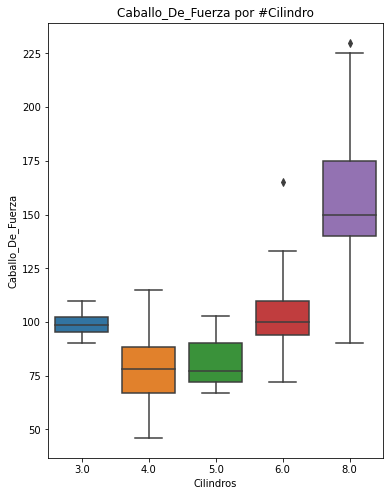

In [105]:
#grafica de cajas y bigotes para los caballos de fuerza por cilindros
fig, ax = plt.subplots(figsize=(6, 8))          #la funcion con el tamaño del grafico a mostrar

sns.boxplot(
        x     = 'Cilindros',                    #variable en el eje x
        y     = 'Caballo_De_Fuerza',            #variable en el eje y
        data  = df4,
        ax    = ax
    )

ax.set_title('Caballo_De_Fuerza por #Cilindro');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


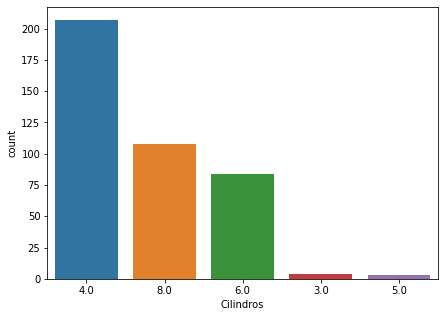

In [106]:
#grafica de barras de la cantidad de autos por la cantidad de cilindros
plt.figure(figsize=(7,5))
sns.countplot(df4['Cilindros'], order=df4['Cilindros'].value_counts().index)

In [107]:
# caballos de fuerza por anyo según número de cilindros
table = pd.pivot_table(df4, values='Caballo_De_Fuerza', index=['Anyo'],
                    columns=['Cilindros'], aggfunc=np.mean, fill_value=0)
table

Cilindros,3.0,4.0,5.0,6.0,8.0
Anyo,,,,,
1/01/1970,0,91.125000,0,91.750000,178.869565
1/01/1971,0,74.607143,0,98.875000,166.857143
1/01/1972,97,85.142857,0,0.000000,159.692308
1/01/1973,90,82.909091,0,102.125000,170.000000
1/01/1974,0,74.000000,0,102.214286,146.000000
1/01/1975,0,84.916667,0,96.750000,142.000000
1/01/1976,0,75.600000,0,98.700000,146.333333
1/01/1977,110,78.785714,0,102.000000,152.375000
1/01/1978,0,79.705882,103,109.833333,135.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


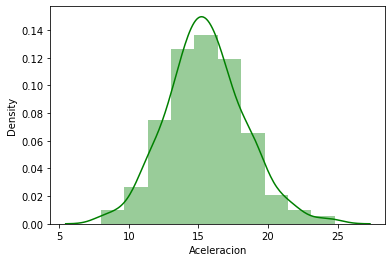

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


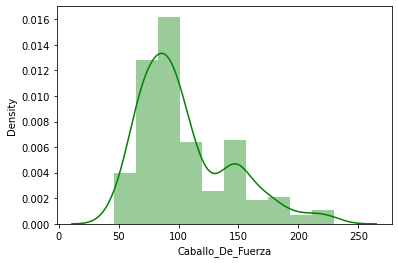

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


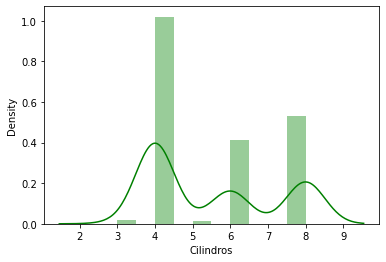

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


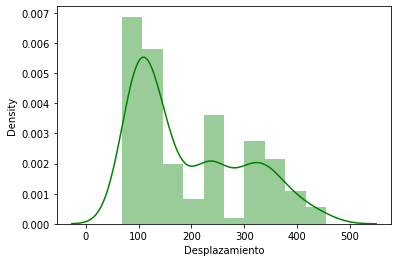

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


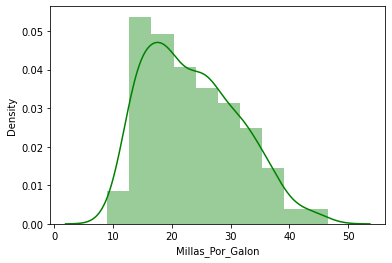

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


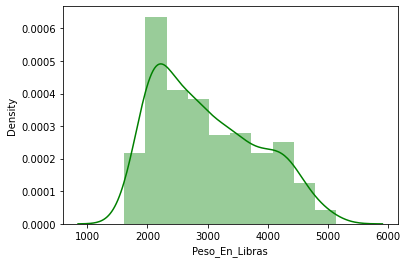

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


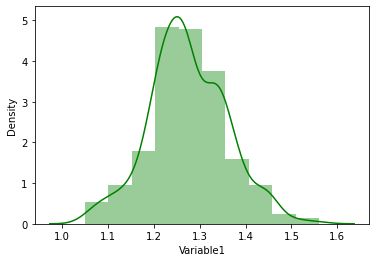

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


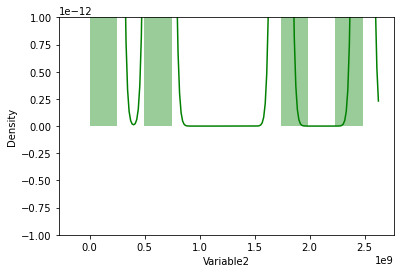

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


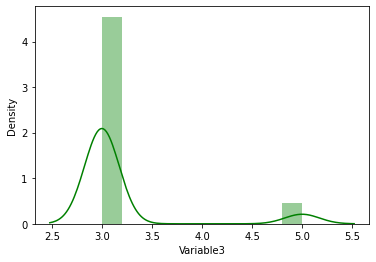

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


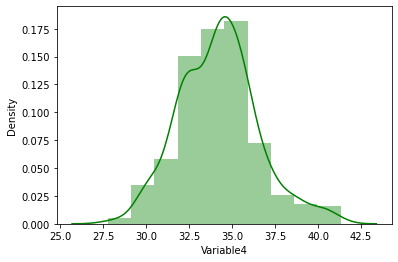

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


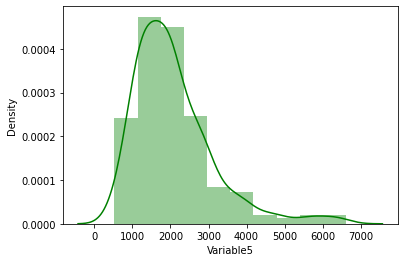

In [108]:
#iteramos por las distintas variables númericas para mostrar un histrograma y su curva de normalidad para cada variable
for k in df4.select_dtypes(include=['float64', 'int']).columns:
  sns.distplot(df4[k],color='g',bins=10,kde=True)
  plt.show()

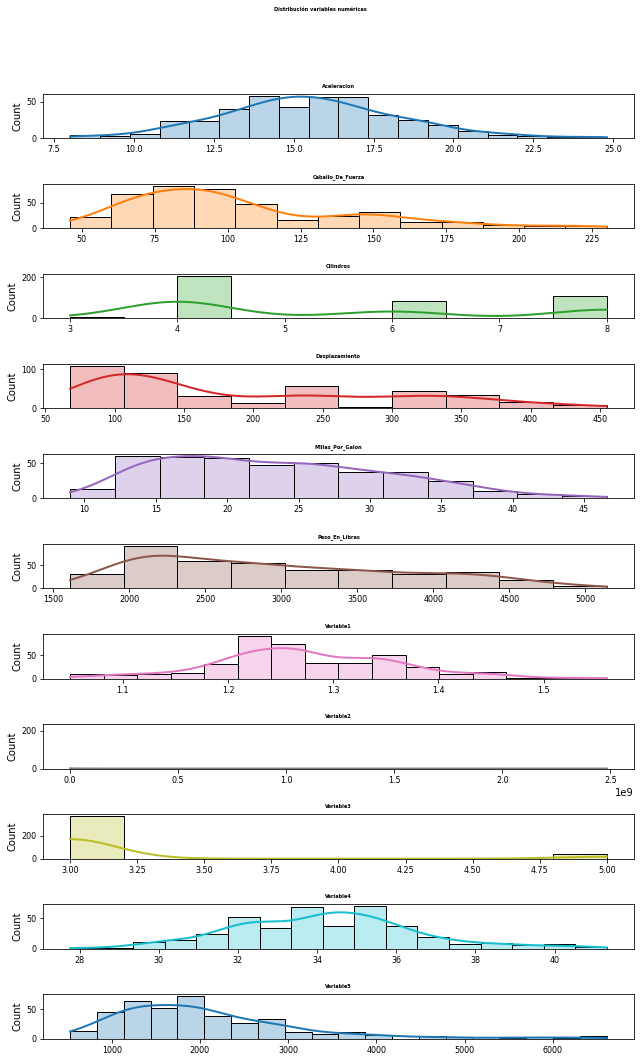

In [45]:
#otra forma de realizar
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(9, 15)) 
axes = axes.flat
colum_num = df4.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(colum_num):
    sns.histplot(
        data    = df4,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 5, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 5, fontweight = "bold");

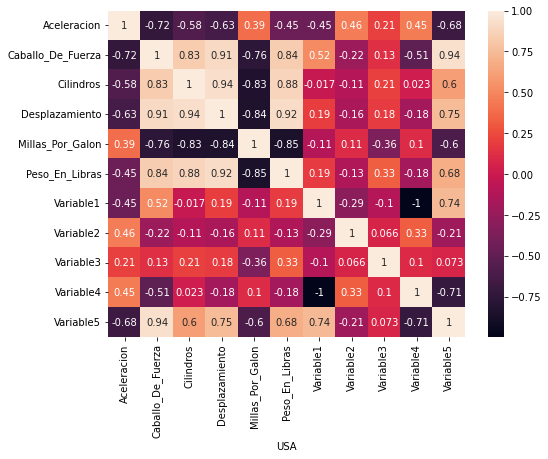

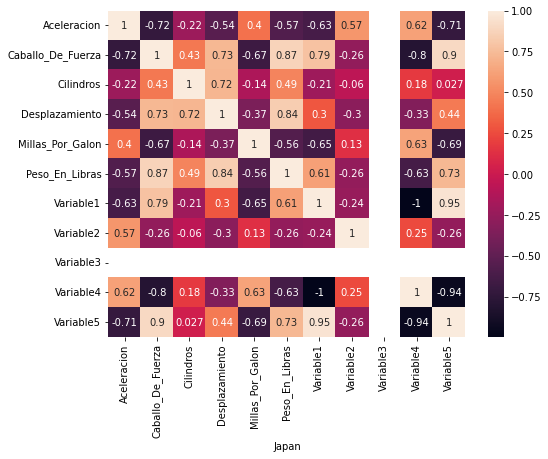

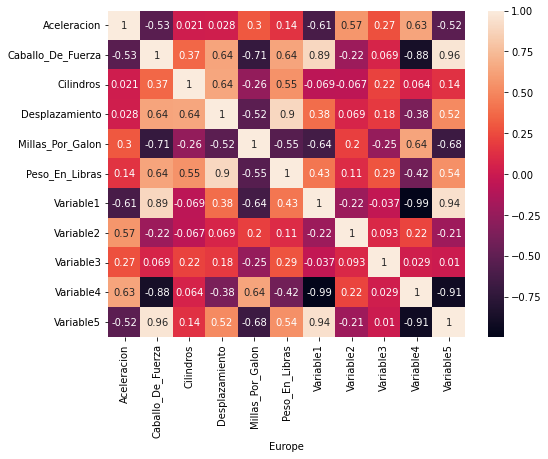

In [109]:
a=dict(df4['Pais_Origen'].value_counts())   #identificamos los paises en la columna
for i in a.keys():                          #iteramos
  df5=df4[df4['Pais_Origen'] == i]          #filtramos para cada país
  columnas4=df5.select_dtypes(include=['float64', 'int']).columns    #solo llamamos columnas numéricas
  df6=df5.loc[:,columnas4]                              
  plt.figure(figsize=(8,6))                     #tamaño de los graficos
  correlacion = df6.corr()                      #calculamos la correlacion
  correlacion.columns.name = i                  #asignamos el nombre al índice
  sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True
            );
  

